In [1]:
import gzip 

In [2]:
with gzip.open('/Users/NAMEERA/goodreads_books.json.gz','rt') as f:
    line = f.readline()

In [3]:
line

'{"isbn": "0312853122", "text_reviews_count": "1", "series": [], "country_code": "US", "language_code": "", "popular_shelves": [{"count": "3", "name": "to-read"}, {"count": "1", "name": "p"}, {"count": "1", "name": "collection"}, {"count": "1", "name": "w-c-fields"}, {"count": "1", "name": "biography"}], "asin": "", "is_ebook": "false", "average_rating": "4.00", "kindle_asin": "", "similar_books": [], "description": "", "format": "Paperback", "link": "https://www.goodreads.com/book/show/5333265-w-c-fields", "authors": [{"author_id": "604031", "role": ""}], "publisher": "St. Martin\'s Press", "num_pages": "256", "publication_day": "1", "isbn13": "9780312853129", "publication_month": "9", "edition_information": "", "publication_year": "1984", "url": "https://www.goodreads.com/book/show/5333265-w-c-fields", "image_url": "https://images.gr-assets.com/books/1310220028m/5333265.jpg", "book_id": "5333265", "ratings_count": "3", "work_id": "5400751", "title": "W.C. Fields: A Life on Film", "ti

The json file has been streamed using the GZIP pathway. Through this method, the compressed json file that in originality is of 10 gigabytes is compressed to 1.9G. However, if the file is decompressed, the copies created while running the program would occupy all the memory available. Thus, using the gzip module would assist in streaming the file line by line. 

This file has to be imported into pandas to convert it into a readable format. As we already are aware that a json file is similar to that of the key-value pair in pandas, it would be easier to import. 

In [4]:
#import json
import json

#using.loads() to load the lines 
json.loads(line)

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [5]:
#parsing necessary features into pandas dictionary
#return only selected features from line
def parse_features(line):
    data = json.loads(line)
    return {
        "book_id":data['book_id'],
        "title":data['title_without_series'],
        "ratings":data['ratings_count'],
        "cover_image":data['image_url'],
        "url":data['url'],
        "description":data['description']
   
    }

In [6]:
#to append titles to dictionary from 
#filter titles with more than 10 ratings 
book_titles = []
with gzip.open('/Users/NAMEERA/goodreads_books.json.gz','rt') as f:
    while True:
        line = f.readline() #this line would execute a continuous loop on this data set and would not break until there is one constructed in the code
        if not line:
            break #if there exists no line further, break
        #to parse the chosen features/fields
        fields = parse_features(line)
        
        #creating trial and exceptions for the data required
        try:
            ratings = int(fields['ratings'])
        except ValueError:
            continue
        if ratings > 15:
            book_titles.append(fields)
            

In [7]:
#import line into pandas dataframe
import pandas as pd

titles = pd.DataFrame.from_dict(book_titles)

In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308957 entries, 0 to 1308956
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   book_id      1308957 non-null  object
 1   title        1308957 non-null  object
 2   ratings      1308957 non-null  object
 3   cover_image  1308957 non-null  object
 4   url          1308957 non-null  object
 5   description  1308957 non-null  object
dtypes: object(6)
memory usage: 59.9+ MB


The dtypes of the features are of object. This would consequently bring in discrepancies. Hence converting the necessary features into right dtypes is adviced.

In [9]:
titles['ratings'] = pd.to_numeric(titles['ratings'])

In [10]:
titles.dtypes

book_id        object
title          object
ratings         int64
cover_image    object
url            object
description    object
dtype: object

In [11]:
titles

,book_id,title,ratings,cover_image,url,description
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ..."
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p..."
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo..."
...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he..."
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ..."
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ..."


Creating a search engine for books requires uniformity in the data presented. The titles consist of a mixture of upper, lower case, numeric and spatial connotations. This may mislead the program to believe that titles that technically are the same be treated as separate entries. 

In [12]:
titles['modified_title'] = titles['title'].str.replace("[^a-zA-Z0-9 ]","", regex=True)

In [13]:
titles

,book_id,title,ratings,cover_image,url,description,modified_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,The Unschooled Wizard Sun Wolf and Starhawk 12
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,Best Friends Forever
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",The Aeneid for Boys and Girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",Alls Fairy in Love and War Avalon Web of Magic 8
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",The Devils Notebook
...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",Ondine Ondine Quartet 05
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,Jacqueline Kennedy Onassis Friend of the Arts
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",The Spaniards Blackmailed Bride
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",The Childrens Classic Poetry Collection


In [14]:
titles['modified_title'] = titles['modified_title'].str.lower()

In [15]:
titles['modified_title'] = titles['modified_title'].str.replace("\s+", " ",regex=True)

In [16]:
titles

,book_id,title,ratings,cover_image,url,description,modified_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,best friends forever
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",the aeneid for boys and girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",alls fairy in love and war avalon web of magic 8
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",the devils notebook
...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",ondine ondine quartet 05
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,jacqueline kennedy onassis friend of the arts
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",the spaniards blackmailed bride
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",the childrens classic poetry collection


In [17]:
#to check if there any title fields with 0 length
titles = titles[titles['modified_title'].str.len()>0]
titles

,book_id,title,ratings,cover_image,url,description,modified_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,best friends forever
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",the aeneid for boys and girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",alls fairy in love and war avalon web of magic 8
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",the devils notebook
...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",ondine ondine quartet 05
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,jacqueline kennedy onassis friend of the arts
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",the spaniards blackmailed bride
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",the childrens classic poetry collection


In [18]:
#filtering titles with descriptions
titles = titles[titles['description'].str.len()>0]
titles

,book_id,title,ratings,cover_image,url,description,modified_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,best friends forever
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",the aeneid for boys and girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",alls fairy in love and war avalon web of magic 8
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",the devils notebook
...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",ondine ondine quartet 05
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,jacqueline kennedy onassis friend of the arts
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",the spaniards blackmailed bride
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",the childrens classic poetry collection


In [21]:
#checking random book title and description
titles['modified_title'][786]
titles['description'][786]

"The enchanting story of a midwestern girl who escapes a family tragedy and is remade as a movie star during Hollywood's golden age.\nIn 1920, Elsa Emerson, the youngest and blondest of three sisters, is born in idyllic Door County, Wisconsin. Her family owns the Cherry County Playhouse, and more than anything, Elsa relishes appearing onstage, where she soaks up the approval of her father and the embrace of the audience. But when tragedy strikes her family, her acting becomes more than a child1s game of pretend.\nWhile still in her teens, Elsa marries and flees to Los Angeles. There she is discovered by Irving Green, one of the most powerful executives in Hollywood, who refashions her as a serious, exotic brunette and renames her Laura Lamont. Irving becomes Laura's great love; she becomes an Academy Award-winning actress--and a genuine movie star. Laura experiences all the glamour and extravagance of the heady pinnacle of stardom in the studio-system era, but ultimately her story is a

In [22]:
#Word count distribution for the description
#using lambda to count the number of words
titles['word_count']= titles['description'].apply(lambda x: len(str(x).split()))

<ipython-input-22-120c78ab6bd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['word_count']= titles['description'].apply(lambda x: len(str(x).split()))


In [23]:
titles

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://images.gr-assets.com/books/1304100136m...,https://www.goodreads.com/book/show/7327624-th...,Omnibus book club edition containing the Ladie...,the unschooled wizard sun wolf and starhawk 12,14
1,6066819,Best Friends Forever,51184,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/6066819-be...,Addie Downs and Valerie Adler were eight when ...,best friends forever,104
2,287141,The Aeneid for Boys and Girls,46,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,"Relates in vigorous prose the tale of Aeneas, ...",the aeneid for boys and girls,55
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"To Kara's astonishment, she discovers that a p...",alls fairy in love and war avalon web of magic 8,164
4,287149,The Devil's Notebook,986,https://images.gr-assets.com/books/1328768789m...,https://www.goodreads.com/book/show/287149.The...,"Wisdom, humor, and dark observations by the fo...",the devils notebook,34
...,...,...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://images.gr-assets.com/books/1379766592m...,https://www.goodreads.com/book/show/17805813-o...,"""I shouldn't get involved.""\nRebellious and he...",ondine ondine quartet 05,160
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/331839.Jac...,One of the most popular series ever published ...,jacqueline kennedy onassis friend of the arts,45
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,"Blackmailed into marriage to save her family, ...",the spaniards blackmailed bride,68
1308955,2342551,The Children's Classic Poetry Collection,36,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2342551.Th...,"Gathers poems by William Blake, Emily Bronte, ...",the childrens classic poetry collection,24


In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Description word count'}, ylabel='Frequency'>

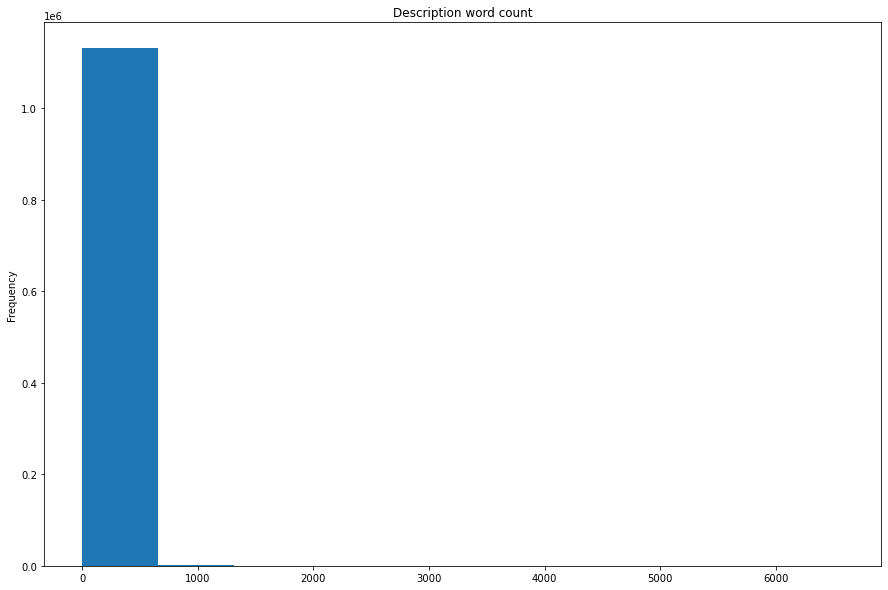

In [26]:
titles['word_count'].plot(kind='hist',bins=10,figsize=(15,10),title='Description word count')

In [27]:
titles['word_count'].value_counts()

121     6370
113     6298
110     6281
125     6281
99      6274
        ... 
1420       1
1409       1
1407       1
1395       1
1022       1
Name: word_count, Length: 1241, dtype: int64

The descriptions provided for over 50% of the books in goodreads have short descriptions. It ranges from 300-600 words approximately.

Although book descriptions can also be used as a factor for classification, book titles and ratings are the primary point of focus in this project. 

# Feature Extraction for search engine

In [28]:
#import scikit modules
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

This feature extraction technique converts arbitrary texts and images into numbers for the computer to read and place in a frequency inverse matrix. This deals with the similarity measures that detects books or any product that matches with the one that concerns us.

In [29]:
tfidf =vectorizer.fit_transform(titles['modified_title'])

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re

def search(query,vectorizer):
    processed = re.sub("[^a-zA-Z0-9]","",query.lower())
    query_vec = vectorizer.transform([query])
    similarity = cosine_similarity(query_vec,tfidf).flatten() #to print a 1d-array
    indices = np.argpartition(similarity,-10)[-10:]
    results = titles.iloc[indices]
    results = results.sort_values('ratings',ascending=False)
    return results

In [61]:
search("harry potter",vectorizer)

,book_id,title,ratings,cover_image,url,description,modified_title,word_count
129532,7809996,"هاري بوتر وحجرة الأسرار (Harry Potter, #2)",1117,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/7809996,hr~ bwtr wHjr@ l'srr b`d 'n ntht lsn@ ldrsy@ l...,harry potter 2,75
1044938,49869,"هاري بوتر وسجين أزكابان (Harry Potter, #3)",1023,https://images.gr-assets.com/books/1329651788m...,https://www.goodreads.com/book/show/49869._,lktb lthlth mn slsl@ ktb hry bwtr llmw'lf@ lbr...,harry potter 3,61
19737,49839,"هاري بوتر وكأس النار (Harry Potter, #4)",957,https://images.gr-assets.com/books/1312417199m...,https://www.goodreads.com/book/show/49839._,ntht mtHnt lSf lthlth fy mdrs@ hwjwrts lt`lym ...,harry potter 4,67
903847,70355,"هاري بوتر وجماعة العنقاء (Harry Potter, #5)",955,https://images.gr-assets.com/books/1351790790m...,https://www.goodreads.com/book/show/70355._,"'nzl ""dmbldwr"" ydyh wnZr l~ ""hry"" mn fwq nZrth...",harry potter 5,99
138743,14560521,"הארי פוטר והאסיר מאזקבאן (Harry Potter, #3)",36,https://images.gr-assets.com/books/1349261442m...,https://www.goodreads.com/book/show/14560521,"bmshk 12 shnym rvkvt, hvkhzq syr bshm syryvs b...",harry potter 3,108
676146,22601967,"ჰარი პოტერი და ფენიქსის ორდენი (Harry Potter, #5)",33,https://images.gr-assets.com/books/1404053183m...,https://www.goodreads.com/book/show/22601967,Harry Potter is due to start his fifth year at...,harry potter 5,80
993632,6352404,"הארי פוטר ואוצרות המוות (Harry Potter, #7)",33,https://images.gr-assets.com/books/1281662787m...,https://www.goodreads.com/book/show/6352404,ntl `tsvm mvnkh `l ktpyv shl hry pvtr. hmshymh...,harry potter 7,127
993631,6352403,"הארי פוטר ומסדר עוף החול (Harry Potter, #5)",32,https://images.gr-assets.com/books/1320636301m...,https://www.goodreads.com/book/show/6352403,bqtsh msdrvn dvmm nytsbt dlt. hdlt hzt rvdpt t...,harry potter 5,164
1179696,29546135,ჰარი პოტერი და სიკვდილის საჩუქრები (Harry Pott...,21,https://images.gr-assets.com/books/1458298071m...,https://www.goodreads.com/book/show/29546135,"hari da misi megobrebi, roni da hermiona agrz'...",harry potter 7,58
202148,22614785,Гарри Поттер и узник Азкабана (Harry Potter #3),16,https://images.gr-assets.com/books/1404300583m...,https://www.goodreads.com/book/show/22614785,"Kniga, pokorivshaia mir, etalon literatury dli...",harry potter 3,29
